<a href="https://colab.research.google.com/github/yvishyst/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

In [3]:
#Looking at a few rows of population data
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [4]:
#Looking at a few rows of geo data
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [2]:
#Looking at a few rows of cell phones data
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [5]:
#Joining cellphones and population data
cell_population = cell_phones.merge(population)
print(cell_population.shape)
cell_population.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [7]:
#Joining cell population and geo country data
cell_population = cell_population.merge(geo_country_codes[['geo','country']])
print(cell_population.shape)
cell_population.head()

(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [9]:
#Dividing the total cell phones by total population to get cells per person
cell_population['cell_per_person'] = cell_population['cell_phones_total']/cell_population['population_total']
#Checking if the calucation was done correctly
cell_population[(cell_population.country=='United States') & (cell_population.time==2017)]

,geo,time,cell_phones_total,population_total,country,cell_per_person
8134,usa,2017,395881000.0,324459463,United States,1.220125


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
#Modifying geo columns to make it uppercase
cell_population['geo'] = cell_population['geo'].str.upper()

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [19]:
#Describe for numeric columns
cell_population.describe()

,time,cell_phones_total,population_total,cell_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [21]:
#Describe for non numeric columns
cell_population.describe(exclude='number')

,geo,country
count,8590,8590
unique,195,195
top,CRI,Bahrain
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [24]:
#Top 5 countries with most cell phones
cell_population[cell_population.time==2017][['country','cell_phones_total']].sort_values('cell_phones_total',ascending=False)[:5]

,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [27]:
cell_population[(cell_population.geo=='USA') & (cell_population.cell_phones_total>cell_population.population_total)].sort_values('time')[:1]

#In the year 2014, for the first time USA had more cell phones than people

,geo,time,cell_phones_total,population_total,country,cell_per_person
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164


### Part 4. Reshape data


Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [52]:
#Creating a pivot tabel as per the specifications above.
countries = ['China','India','United States','Indonesia','Brazil']
years = [year for year in range(2007,2018)]
cell_pivot = cell_population[cell_population.country.isin(countries)&(cell_population.time.isin(years))].pivot_table(index='country',columns='time',values='cell_phones_total').reset_index()
cell_pivot

time,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
1,China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
2,India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
3,Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
4,United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [59]:
#Creating a new column which has cell increase between years 2007 and 2017
cell_pivot['cell_increase'] = cell_pivot[2017]-cell_pivot[2007]
#Sorting the table with the highest number of cell phone increase in the years 2007 to 2017
cell_pivot.sort_values('cell_increase',ascending=False)
#India had 935,282,277 more cell phones in 2017 versus 2007

time,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,cell_increase
2,India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0","935,282,277.0"
1,China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0","926,791,000.0"
3,Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0","365,536,321.0"
4,United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0","146,581,000.0"
0,Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0","115,508,445.0"


In [0]:
#India had 935,282,277 more cell phones in 2017 versus 2007

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [62]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [68]:
guests_occupation = pd.crosstab(df['Occupation'],df['Year'],normalize='columns')
guests_occupation

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",0.9036144578313253,0.7396449704142012,0.7261146496815286,0.6226415094339622,0.5602409638554217,0.38414634146341464,0.37037037037037035,0.36024844720496896,0.2553191489361702,0.2073170731707317,0.2085889570552147,0.3515151515151515,0.3374233128834356,0.2682926829268293,0.42771084337349397,0.39263803680981596,0.45
Government and Politics,0.012048192771084338,0.08284023668639054,0.03821656050955414,0.06918238993710692,0.10240963855421686,0.22560975609756098,0.16049382716049382,0.19254658385093168,0.1702127659574468,0.20121951219512196,0.2085889570552147,0.18181818181818182,0.1656441717791411,0.20121951219512196,0.12650602409638553,0.12883435582822086,0.17
Media,0.06626506024096386,0.1242603550295858,0.19745222929936307,0.2641509433962264,0.2469879518072289,0.27439024390243905,0.3333333333333333,0.2919254658385093,0.3333333333333333,0.4695121951219512,0.3619631901840491,0.30303030303030304,0.3128834355828221,0.3170731707317073,0.3072289156626506,0.32515337423312884,0.24
Other,0.018072289156626505,0.05325443786982249,0.03821656050955414,0.0440251572327044,0.09036144578313253,0.11585365853658537,0.13580246913580246,0.15527950310559005,0.24113475177304963,0.12195121951219512,0.22085889570552147,0.16363636363636364,0.18404907975460122,0.21341463414634146,0.13855421686746988,0.15337423312883436,0.14


### Part 2 — Recreate this explanatory visualization:

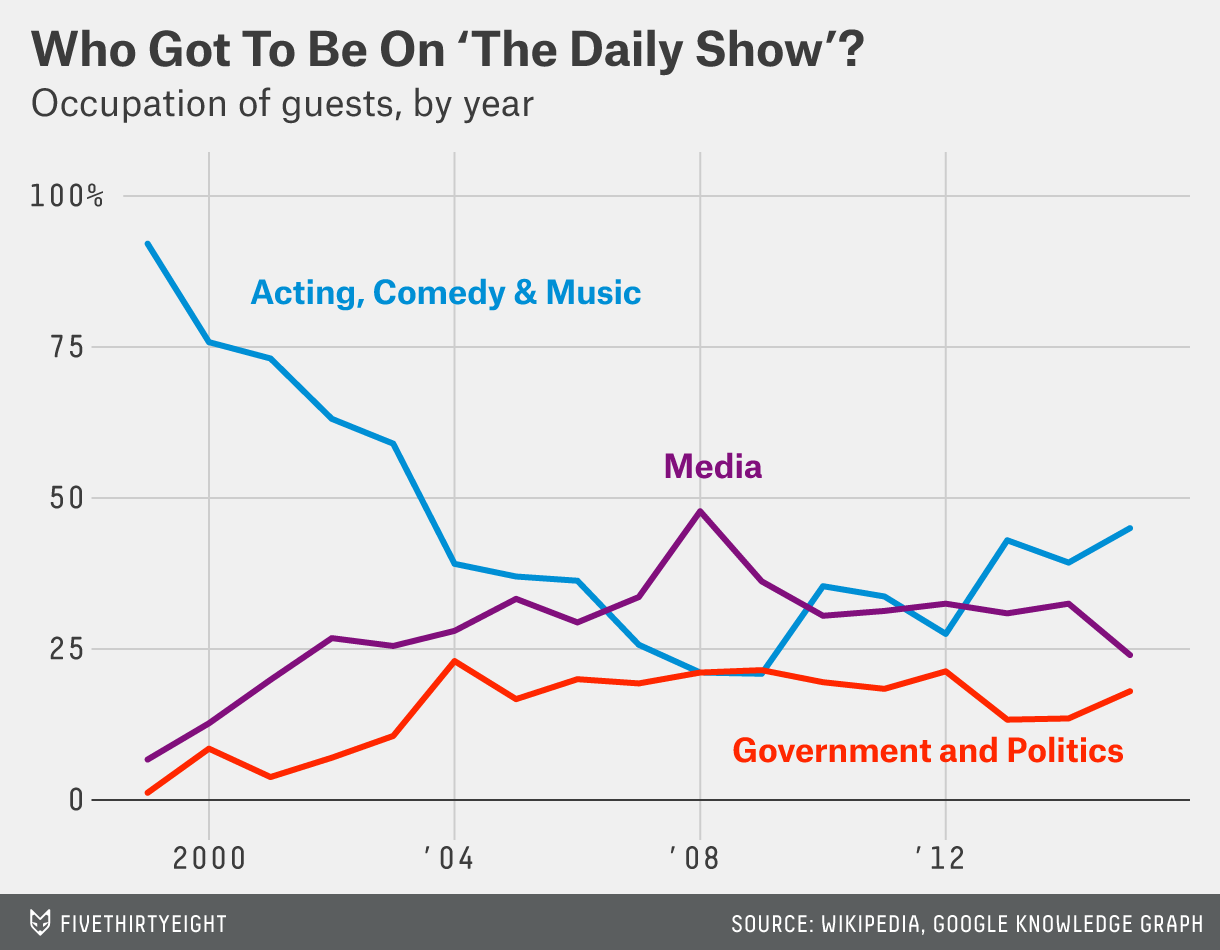

In [66]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [114]:
#Using the melt function to get the data into tidy format
guests_data = pd.melt(guests_occupation.reset_index(),id_vars='Occupation')
guests_data.columns = ['occupation','year','pct_appearance']
#Converting appearance to percentage
guests_data['pct_appearance'] = guests_data['pct_appearance']*100
guests_data.head()

,occupation,year,pct_appearance
0,"Acting, Comedy & Music",1999,90.36144578313254
1,Government and Politics,1999,1.2048192771084338
2,Media,1999,6.626506024096386
3,Other,1999,1.8072289156626504
4,"Acting, Comedy & Music",2000,73.96449704142012


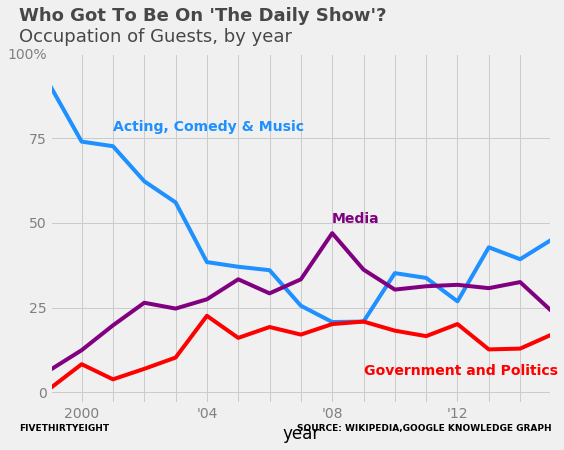

In [221]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6),clear=True)
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(1,1,1)
occupations = ['Acting, Comedy & Music', 'Government and Politics', 'Media']
colours = ['dodgerblue','red','purple']
i=0
for occupation in occupations:
  guests_data[guests_data.occupation==occupation][['pct_appearance','year']].plot(x='year',y='pct_appearance',color = colours[i],ax=ax,legend=False)
  i +=1
ax.set_xticks([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_xticklabels(labels=["", "2000", "", "", "", "'04", "", "", "", "'08", "",
       "", "", "'12", "", "", ""],color='grey')
ax.set_yticklabels(["0", "25", "50", "75", "100%"],color='grey')
#ax.set_yticklabels(labels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
left,right = ax.get_xlim()
bottom, top = ax.get_ylim()
ax.text(left-1.0,top+9.5,"Who Got To Be On 'The Daily Show'?",weight='bold',size=18,alpha=0.7)
ax.text(left-1.0,top+3.5,"Occupation of Guests, by year",size=18,alpha=0.7)
ax.text(2001, 77, s="Acting, Comedy & Music", fontweight="bold",color='dodgerblue')
ax.text(2008, 50, s="Media", fontweight="bold",color='purple')
ax.text(2009, 5, s="Government and Politics", fontweight="bold",color='red')
ax.text(left-1.0,bottom-8.9,s="FIVETHIRTYEIGHT",ha='left',va='bottom',size=9,weight='bold')
ax.text(right,bottom-8.9,s="SOURCE: WIKIPEDIA,GOOGLE KNOWLEDGE GRAPH",ha='right',va='bottom',size=9,weight='bold');

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.